In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceEstimation

## CelebA - Efficientnet

In [2]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_test_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_test_ef3.csv", True)
df_test_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_test_resnet.csv", True)
df_test_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_test_vgg.csv", True)

In [3]:
from performance import PerformanceOptimisation
po_efficientnet = PerformanceOptimisation(df_test_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_test_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_test_vgg, db, "VGG")

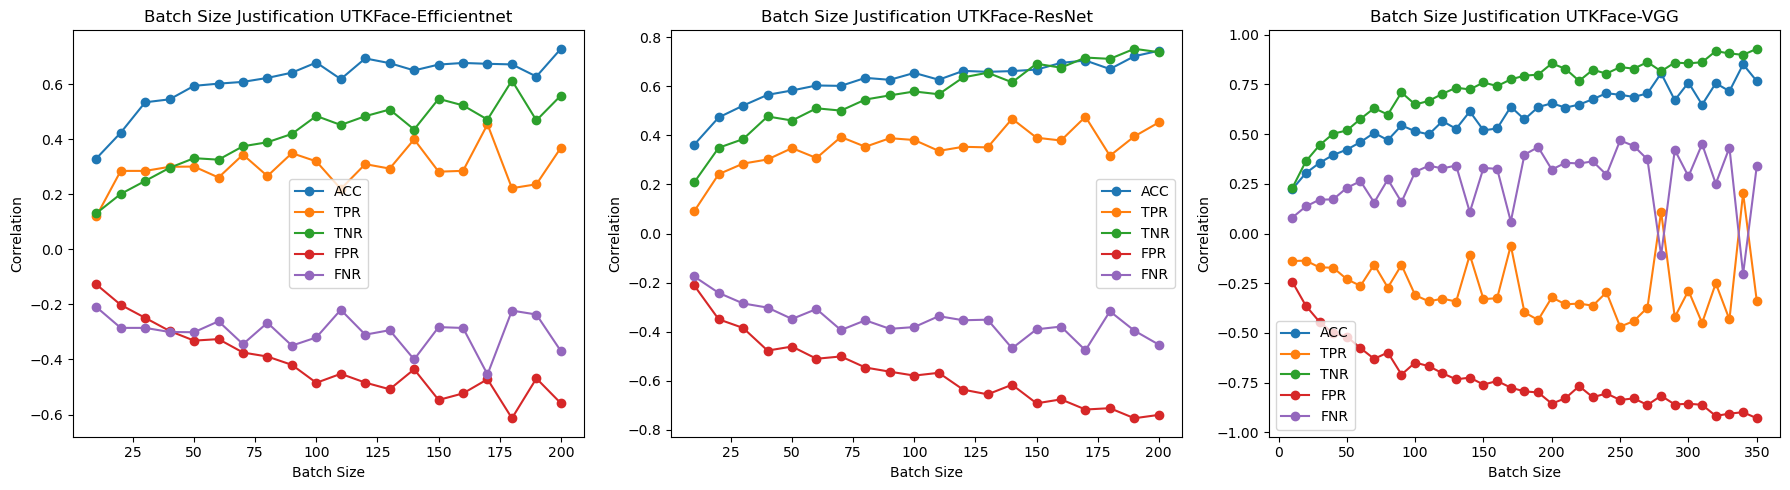

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [5]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=100)
po_resnet.check_optimal_batch_correlation(batch_size=120)
po_vgg.check_optimal_batch_correlation(batch_size=150)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.678974  0.319866  0.484773 -0.484773 -0.319866
ACC       0.678974  1.000000  0.855841  0.522415 -0.522415 -0.855841
TPR       0.319866  0.855841  1.000000  0.155896 -0.155896 -1.000000
TNR       0.484773  0.522415  0.155896  1.000000 -1.000000 -0.155896
FPR      -0.484773 -0.522415 -0.155896 -1.000000  1.000000  0.155896
FNR      -0.319866 -0.855841 -1.000000 -0.155896  0.155896  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.662921  0.353511  0.636306 -0.636306 -0.353511
ACC       0.662921  1.000000  0.872283  0.723664 -0.723664 -0.872283
TPR       0.353511  0.872283  1.000000  0.366701 -0.366701 -1.000000
TNR       0.636306  0.723664  0.366701  1.000000 -1.000000 -0.366701
FPR      -0.636306 -0.723664 -0.366701 -1.000000  1.000000  0.366701
FNR      -0.353511 -0.872283 -1.000000 -0.366701  0.366701  1.000000
          distance       ACC      

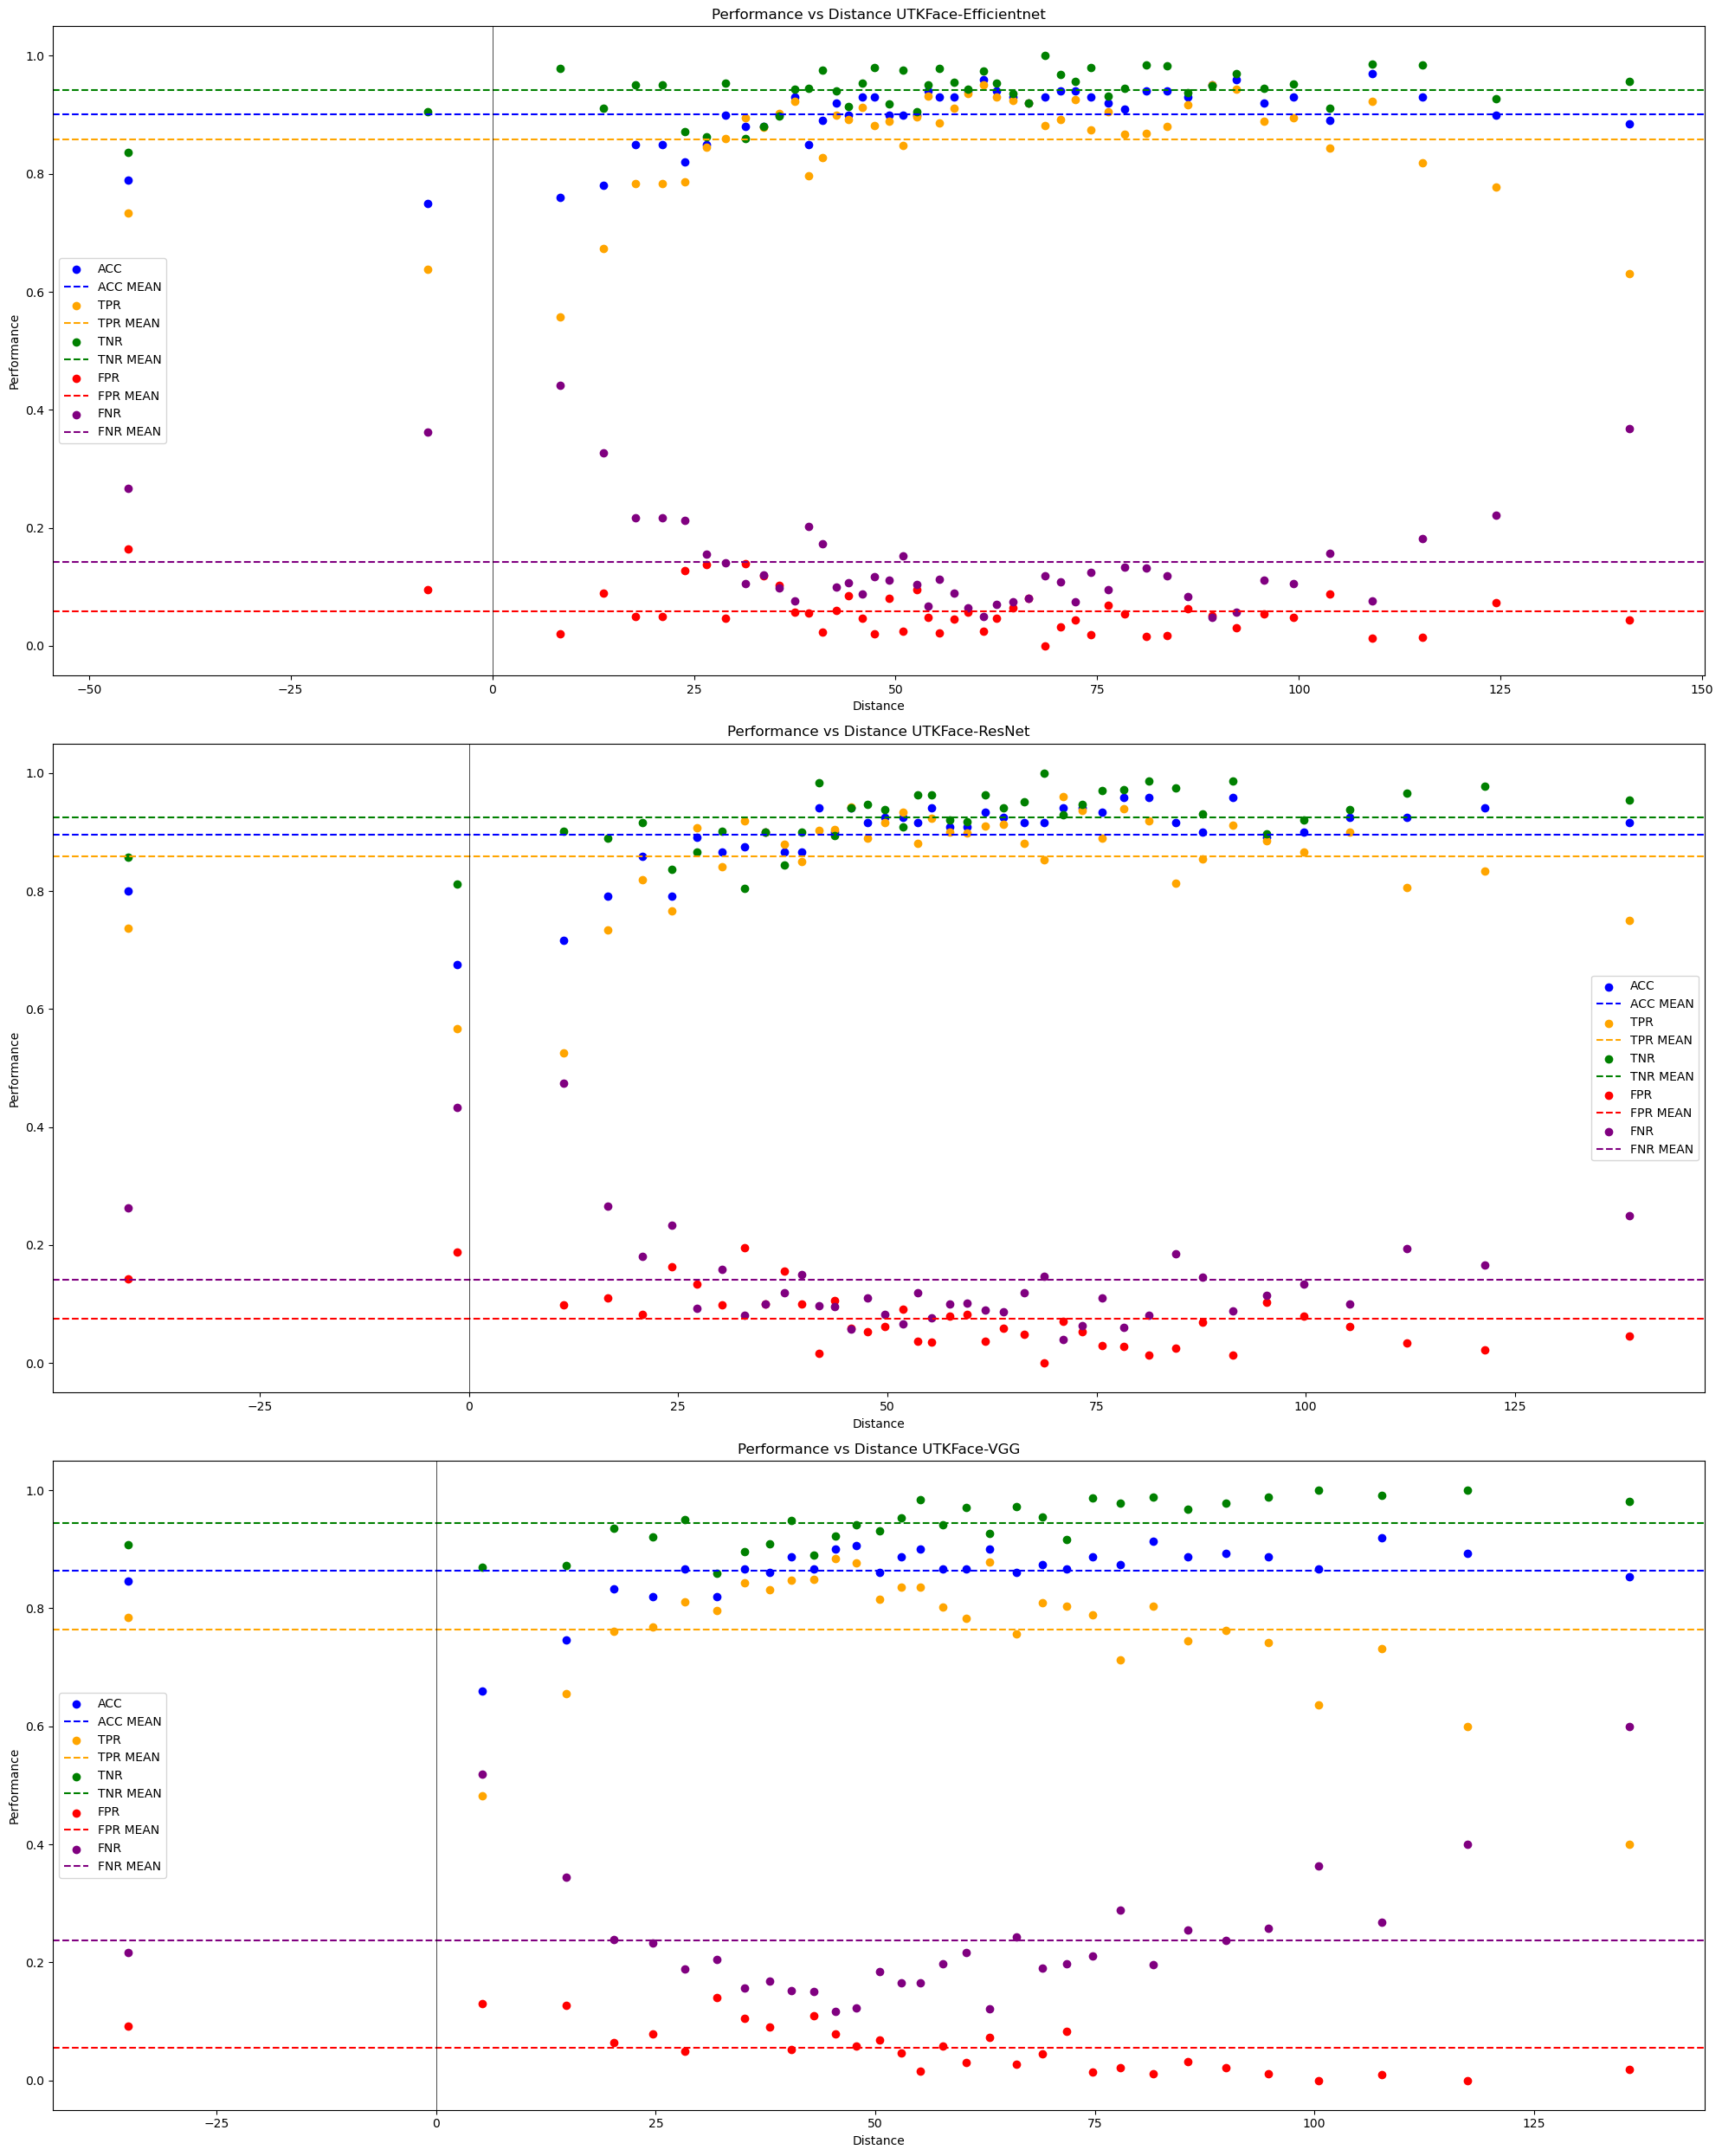

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(20, 25))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

UTKFace - Efficientnet
Degree 1: MSE = 0.006706846315437727
Degree 2: MSE = 0.0039834493470269705
Degree 3: MSE = 0.0022536274717860276
Degree 4: MSE = 0.0018619829819694616
Degree 5: MSE = 0.0014910333214701388
UTKFace - ResNet
Degree 1: MSE = 0.007219990471325116
Degree 2: MSE = 0.0049069713518118795
Degree 3: MSE = 0.003999495782635077
Degree 4: MSE = 0.0024785812557845625
Degree 5: MSE = 0.0016752242859543963
UTKFace - VGG
Degree 1: MSE = 0.010056526731175122
Degree 2: MSE = 0.0057015329232424795
Degree 3: MSE = 0.003952541681616637
Degree 4: MSE = 0.0028093340822256266
Degree 5: MSE = 0.0011164668013738176


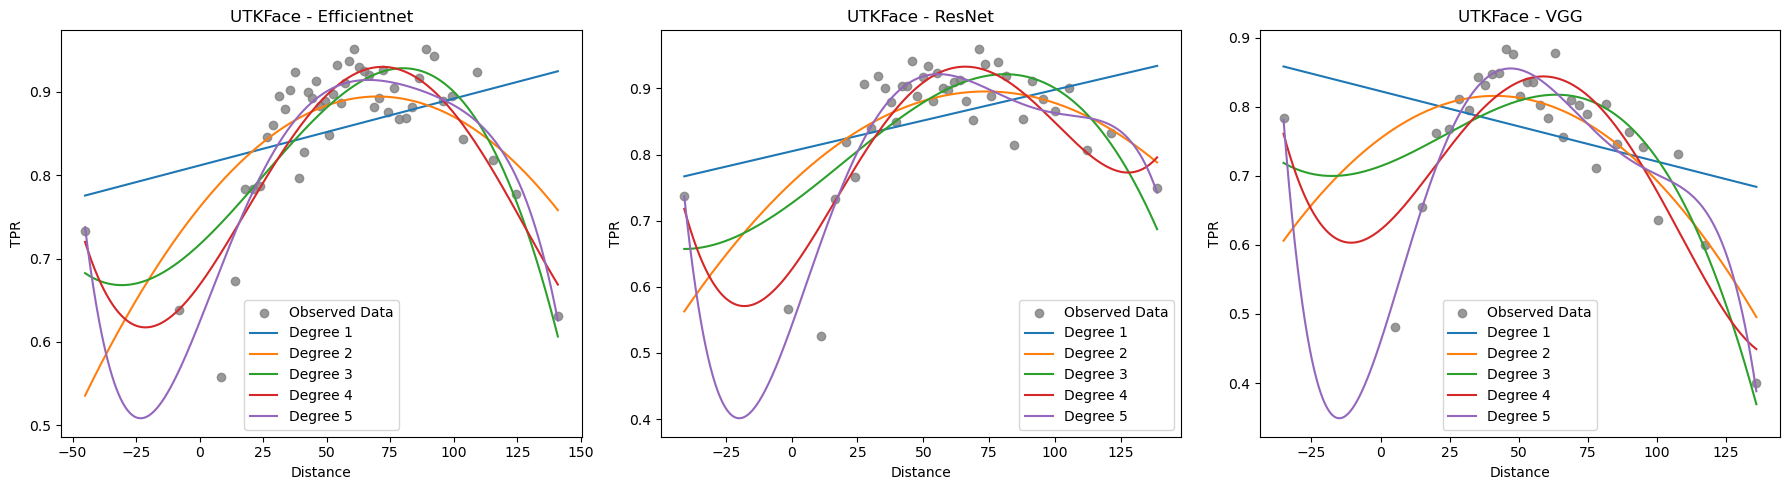

In [7]:
metric = "TPR" # Focus metric for penalty
degrees = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
po_efficientnet.check_optimised_degree(metric, degrees, ax[0])
po_resnet.check_optimised_degree(metric, degrees, ax[1])
po_vgg.check_optimised_degree(metric, degrees, ax[2])

plt.tight_layout()
plt.show()

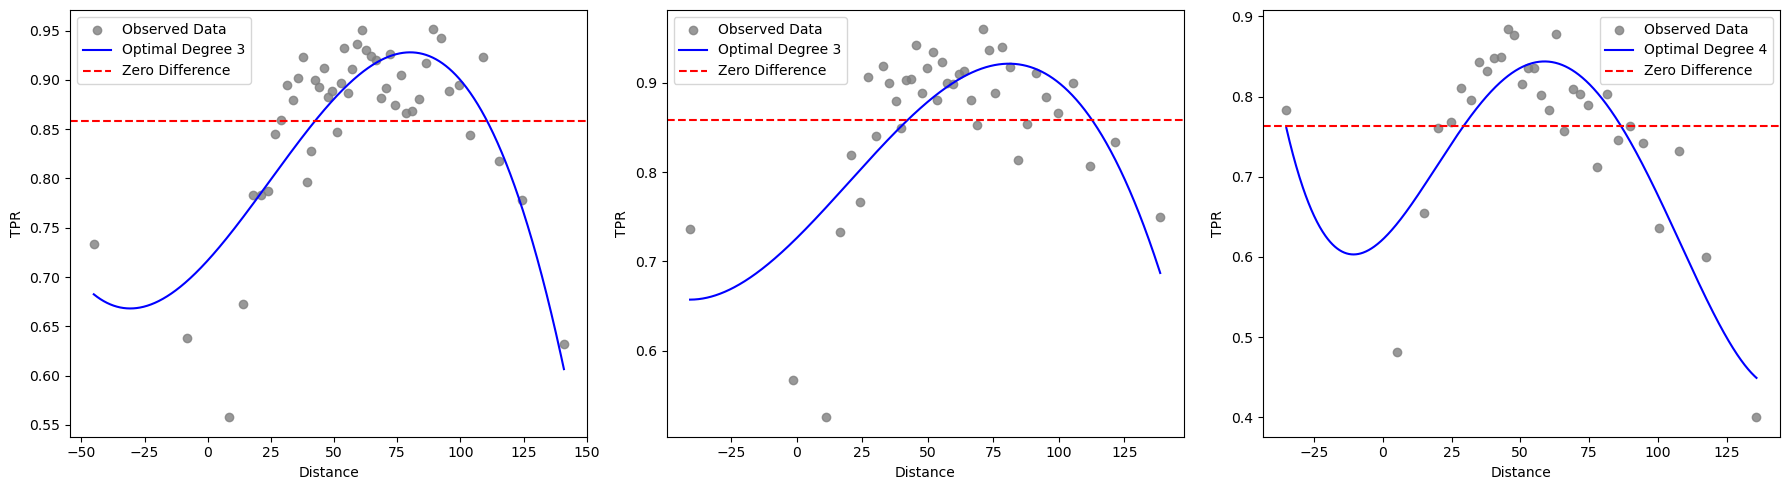

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

optimal_deg = 3
po_efficientnet.diaplay_optimal_degree(metric, optimal_deg, ax[0])

optimal_deg = 3
p = po_resnet.diaplay_optimal_degree(metric, optimal_deg, ax[1])

optimal_deg = 4
po_vgg.diaplay_optimal_degree(metric, optimal_deg, ax[2])

plt.tight_layout()
plt.show()

In [10]:
polynomial_save_file = f"{root}model/pickle/polynomial_model_ef3.pkl"
po_efficientnet.save_optimal_polynomial_model(polynomial_save_file)

polynomial_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
po_resnet.save_optimal_polynomial_model(polynomial_save_file)

polynomial_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"
po_vgg.save_optimal_polynomial_model(polynomial_save_file)

Modle saved
Modle saved
Modle saved
